In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d mahmoudreda55/satellite-image-classification

satellite-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
import zipfile
zip_ref= zipfile.ZipFile('/content/satellite-image-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras import Sequential

import cv2
import os

In [15]:
classes = ['cloudy','desert','green_area','water']
dir = "/content/data"

img_shape =[224,224]

data = []

def loading_data():
  for category in classes:
    path  = os.path.join(dir,category)
    class_num = classes.index(category)
    i = 0
    for img in os.listdir(path):
      if i != 500 :
        img_array = cv2.imread(os.path.join(path,img))
        rgb_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        resize_array = cv2.resize(rgb_array,img_shape)
        data.append([resize_array,class_num])
        i = i+1
      else :
        continue

loading_data()

In [16]:
X = []
y = []
for img,cls in data:
  X.append(img)
  y.append(cls)

In [17]:
X = np.array(X).reshape(-1,224,224)
print(X.shape)

(6000, 224, 224)


In [18]:
X = X / 255.00
X = X.reshape(-1,224,224,3)
X.shape

(2000, 224, 224, 3)

In [19]:
print("Unique classes : ",np.unique(np.array(y)))
print('\n')
print("Count of classes : ")
pd.DataFrame(y).value_counts()

Unique classes :  [0 1 2 3]


Count of classes : 


0    500
1    500
2    500
3    500
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train , X_val , y_train , y_val = train_test_split(X, y ,test_size= 0.2,random_state= 42,shuffle = True)

In [21]:
import tensorflow
y_train = tensorflow.keras.utils.to_categorical(y_train, 4)

In [22]:
y_val = tensorflow.keras.utils.to_categorical(y_val, 4)

In [23]:
print('X train shape : ',X_train.shape)
print('y train shape : ',y_train.shape)
print('\n')
print('X test shape : ',X_val.shape)
print('y test shape : ',y_val.shape)

X train shape :  (1600, 224, 224, 3)
y train shape :  (1600, 4)


X test shape :  (400, 224, 224, 3)
y test shape :  (400, 4)


In [24]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.layers import  Dropout
from keras.callbacks import EarlyStopping

Using VGG19

In [25]:
from keras.applications.vgg19 import VGG19

In [26]:
conv_base2 = VGG19(weights = 'imagenet' , include_top=False , input_shape = (224,224,3))

80134624/80134624 [==============================] - 5s 0us/step


Model3

In [27]:
model3 = Sequential()

model3.add(conv_base2)
model3.add(Flatten())
model3.add(Dense(256,activation='relu'))
model3.add(Dense(4,activation='softmax'))

In [28]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 26448196 (100.89 MB)
Trainable params: 26448196 (100.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
conv_base2.trainable = False

In [30]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 26448196 (100.89 MB)
Trainable params: 6423812 (24.50 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [31]:
model3.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])

In [32]:
history_3 = model3.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
50/50 [==============================] - 28s 271ms/step - loss: 1.1244 - accuracy: 0.6144 - val_loss: 0.6488 - val_accuracy: 0.6675
Epoch 2/30
50/50 [==============================] - 9s 178ms/step - loss: 0.5097 - accuracy: 0.7631 - val_loss: 0.4482 - val_accuracy: 0.7950
Epoch 3/30
50/50 [==============================] - 10s 197ms/step - loss: 0.3381 - accuracy: 0.8856 - val_loss: 0.3406 - val_accuracy: 0.7875
Epoch 4/30
50/50 [==============================] - 10s 197ms/step - loss: 0.3150 - accuracy: 0.8712 - val_loss: 0.2695 - val_accuracy: 0.9450
Epoch 5/30
50/50 [==============================] - 10s 200ms/step - loss: 0.2414 - accuracy: 0.9131 - val_loss: 0.3026 - val_accuracy: 0.8550
Epoch 6/30
50/50 [==============================] - 10s 203ms/step - loss: 0.2100 - accuracy: 0.9287 - val_loss: 0.1574 - val_accuracy: 0.9575
Epoch 7/30
50/50 [==============================] - 10s 205ms/step - loss: 0.2115 - accuracy: 0.9181 - val_loss: 0.1662 - val_accuracy: 0.9650


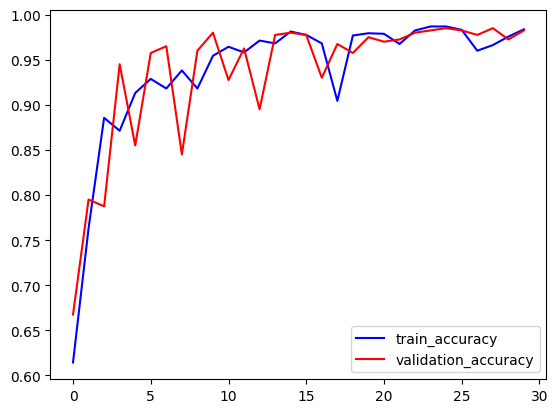

In [33]:
plt.plot(history_3.history['accuracy'],color='blue',label='train_accuracy')
plt.plot(history_3.history['val_accuracy'],color='red',label='validation_accuracy')
plt.legend()
plt.show()

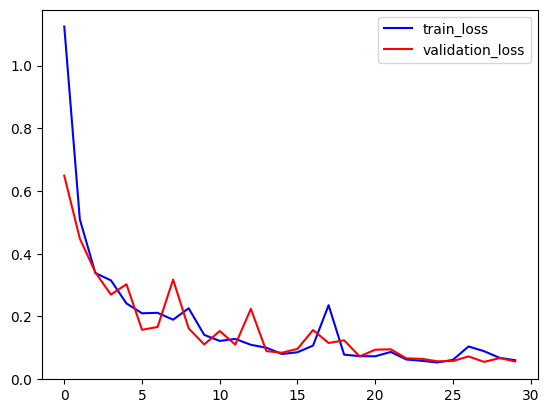

In [34]:
plt.plot(history_3.history['loss'],color='blue',label='train_loss')
plt.plot(history_3.history['val_loss'],color='red',label='validation_loss')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import classification_report

classes = sorted(os.listdir(dir))

predict = model3.predict(X_val)
pred_classes = np.argmax(predict,axis=1)

true_classes = np.argmax(y_val,axis=1)

print(classification_report(true_classes, pred_classes , target_names= classes))

13/13 [==============================] - 2s 154ms/step
              precision    recall  f1-score   support

      cloudy       1.00      1.00      1.00       104
      desert       1.00      1.00      1.00        95
  green_area       0.95      0.98      0.96        88
       water       0.98      0.96      0.97       113

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [36]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(true_classes,pred_classes) ,
             index = ['true_cloudy','true_desert','true_green_area','true_water'],
             columns = ['pred_cloudy','pred_desert','pred_green_area','pred_water'])

,pred_cloudy,pred_desert,pred_green_area,pred_water
true_cloudy,104,0,0,0
true_desert,0,95,0,0
true_green_area,0,0,86,2
true_water,0,0,5,108


In [38]:
model3.save("/content/drive/MyDrive/model1_vgg19.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
